<a href="https://colab.research.google.com/github/swadhwa5/MLFinalProject/blob/main/MLFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from PIL import Image, ImageEnhance
from os import listdir
import imghdr
import skimage
from skimage.transform import rotate, AffineTransform, warp

In [ ]:
#Load Data
# return array of images
def loadImages(path):
    imagesList = listdir(path)
    imgs = []
    labels = []
    for image in imagesList:
      if imghdr.what(path + image) == 'png':
        img = Image.open(path + image)
        imgs.append(img)
        labels.append(image[6]) # assumes that filename structure is 'handx_[label]_....'
        
    return imgs, labels

In [ ]:
# Convert png img array to array np arrays
def ImagesToArray(imgs):
  imgs_array = []
  for img in imgs:
    img_array = np.array(img)
    imgs_array.append(img_array)
  return imgs_array

In [ ]:
def Rotate30(imgs): 
  rot30_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    new_img = rotate(img, 30) 
    rot30_imgs[i, :] = new_img
  return rot30_imgs

In [ ]:
def RotateNeg30(imgs):
  rot30_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    new_img = rotate(img, -30) 
    rot30_imgs[i, :] = new_img
  return rot30_imgs

In [ ]:
def VerticalFlip(imgs): 
  flip_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    new_img = np.fliplr(img)
    flip_imgs[i, :, :, :] = new_img
  return flip_imgs

In [ ]:
def Translation(imgs): 
  trans_imgs = np.empty([imgs.shape[0], imgs.shape[1], imgs.shape[2], imgs.shape[3]])
  for i, img in enumerate(imgs): 
    rand_x = random.randrange(-150, 150, 50)
    rand_y = random.randrange(-150, 150, 50)
    transform = AffineTransform(translation=(rand_x,rand_y))
    new_img = warp(img,transform, mode="constant")  
    trans_imgs[i, :] = new_img
  return trans_imgs

In [ ]:
# x is input image, sd is how much to blur
def GaussianBlur(imgs, sd=1):
  for i, img in enumerate(imgs):
    filtered_img = skimage.filters.gaussian(img, sigma=sd)
    filtered_img.save('./Filter_gaussian/img_' + str(i) + '_gaussianfilt.png')

In [ ]:
import random
def Crop(imgs):
  n = 600
  for i, png in enumerate(imgs): 
    ratio = random.uniform(0, 1)
    size = n * ratio
    x = int(size / 2)
    img = np.asarray(png)
    cropped = img.copy()
    print(cropped.shape)
    cropped[0:x] = np.zeros((n, 3))
    cropped[img.shape[0] - x - 1:img.shape[0] - 1] = np.zeros((x, n, 3))
    cropped[:, 0:x] = np.zeros((n, x, 3))
    cropped[:, img.shape[1] - 1 - x:img.shape[1] - 1] = np.zeros((n, x, 3))
    final = Image.fromarray(np.uint8(cropped*255))
    return cropped
    # final.save('./Crop/img_' + str(i) + '_crop.png')


In [ ]:
import cv2

def Scale(imgs):
  for i, img in enumerate(imgs):
    ratio = random.uniform(.3, .7)
    n = 600
    x = int(ratio * n / 2)
    scaled = img[x:n-x, x:n-x]
    res = cv2.resize(scaled, dsize=(600, 600), interpolation=cv2.INTER_CUBIC)
    final = Image.fromarray(np.uint8(res*255))
    return res
    # final.save('./Crop/img_' + str(i) + '_scale.png')

In [ ]:
### Additional Code: 4/20/22: Redid Shape function, normalize, and also completed blur. Each assumes images list --> shape-->normalize-->blur

import numpy as np
import skimage
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
from PIL import Image, ImageEnhance
from os import listdir
import imghdr
import skimage
from skimage.transform import rotate, AffineTransform, warp
from skimage import filters
from torchvision import transforms
import cv2
import scipy
import random


from google.colab import files
# uploaded = files.upload() # Get a folder named Data.zip

In [ ]:
!unzip Data2.zip

Archive:  Data2.zip
   creating: Data2/
  inflating: Data2/hand1_n_bot_seg_3_cropped.png  
  inflating: __MACOSX/Data2/._hand1_n_bot_seg_3_cropped.png  
  inflating: Data2/hand1_h_left_seg_3_cropped.png  
  inflating: __MACOSX/Data2/._hand1_h_left_seg_3_cropped.png  
  inflating: Data2/hand1_k_bot_seg_1_cropped.png  
  inflating: __MACOSX/Data2/._hand1_k_bot_seg_1_cropped.png  
  inflating: Data2/hand1_v_left_seg_2_cropped.png  
  inflating: __MACOSX/Data2/._hand1_v_left_seg_2_cropped.png  
  inflating: Data2/hand1_j_left_seg_5_cropped.png  
  inflating: __MACOSX/Data2/._hand1_j_left_seg_5_cropped.png  
  inflating: Data2/hand1_w_left_seg_1_cropped.png  
  inflating: __MACOSX/Data2/._hand1_w_left_seg_1_cropped.png  


8
(392, 238, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(56, 600, 600, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


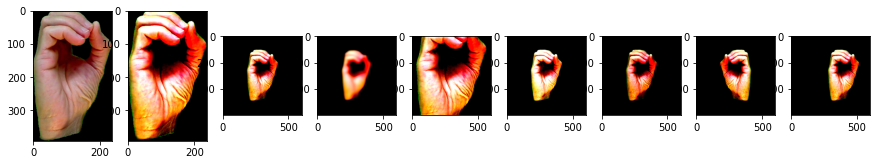

In [ ]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
from PIL import Image, ImageEnhance
from os import listdir
import imghdr
import skimage
from skimage.transform import rotate, AffineTransform, warp
from skimage import filters
from torchvision import transforms
import cv2
import scipy
import random

#Load Data
# return array of images
def loadImages(path):
    imagesList = listdir(path)
    imgs = []
    labels = []
    for image in imagesList:
      if imghdr.what(path + image) == 'png':
        img = Image.open(path + image)
        imgs.append(img)
        labels.append(image[6]) # assumes that filename structure is 'handx_[label]_....'
        
    return imgs, labels

# Convert png img array to array np arrays
def ImagesToArray(imgs):
  imgs_array = []
  for img in imgs:
    img_array = np.array(img)
    imgs_array.append(img_array)
  return imgs_array

# Reshape Images   
def shape600(x):
  print(len(x))
  print(x[0].shape)
  reshaped_array = np.zeros((len(x), 600, 600, 3))
  for i, img in enumerate(x):
    x_pad_width = (600 - img.shape[0])//2
    y_pad_width = (600 - img.shape[1])//2
    reshaped_array[i,:,:,:] = np.pad(img, ((x_pad_width, x_pad_width + (img.shape[0])%2), (y_pad_width, y_pad_width+(img.shape[1]%2)), (0,0)), constant_values=img[0][0][0])
  return reshaped_array

# Normalize images
def Normalize(imgs):
  new_imgs = []
  for img in imgs:
      # flat_img = img.flatten()
      m = np.mean(img)
      std = np.std(img)
      img = (img-m)/std
      new_imgs.append(img)
  return new_imgs

# x is input image, sd is how much to blur
def blur(imgs, sd=1):
  filtered_img = np.zeros((imgs.shape[0], 600, 600, 3))
  for i in range(imgs.shape[0]):
    filtered_img[i,:,:,:] = skimage.filters.gaussian(imgs[i,:,:,:], sigma=sd)
    #filtered_img.save('./Filter_gaussian/img_' + i + '_gaussianfilt.png')
  return filtered_img

def Scale(imgs):
  scaled_images = np.zeros((len(imgs), 600, 600, 3))
  for i, img in enumerate(imgs):
    ratio = random.uniform(.3, .7)
    x = int(ratio * 600 / 2)
    scaled = img[x:600-x, x:600-x]
    # scaled = cv2.imread(scaled)
    res = cv2.resize(scaled, dsize=(600, 600), interpolation=cv2.INTER_CUBIC)
    scaled_images[i] = res
  return scaled_images
    # final.save('./Crop/img_' + str(i) + '_scale.png')

def Brighten_light(imgs):
  Brightened_light_images = np.zeros((len(imgs), 600, 600, 3))
  for i in range (imgs.shape[0]):
    Brightened_light_images[i] = imgs[i] + (0.2, 0.2, 0.2)
    # light_img.save('./Brightness_light/img_' + str(i) + '_light.png')
  return Brightened_light_images

def Brighten_dark(imgs):
  Brightened_dark_images = np.zeros((len(imgs), 600, 600, 3))
  for i in range (imgs.shape[0]):
    Brightened_dark_images[i] = imgs[i] - (0.2, 0.2, 0.2)
    # dark_img.save('./Brightness_dark/img_' + str(i) + '_dark.png')
  return Brightened_dark_images

# load png_images
path = "./Data/"

# images in an array named imgs
imgs, labels = loadImages(path)

# Step 1 convert png_images to np arrays
imgs_array_before = ImagesToArray(imgs)

# # Step 2 Normalize images
imgs_array_normalize = Normalize(imgs_array_before)

# # Step 3 Reshape the images
imgs_array_reshaped = shape600(imgs_array_normalize)

# Step 4 Blur the images
blurred_imgs = blur(imgs_array_reshaped, 10)

# Step 5 Scale the images
scaled_imgs = Scale(imgs_array_reshaped)

# Step 6 Brighten the images
light_imgs = Brighten_light(imgs_array_reshaped)
dark_imgs = Brighten_dark(imgs_array_reshaped)

# Step 7 Flip the images
flipped_imgs = VerticalFlip(imgs_array_reshaped)

# Step 8 Add translation to images
translated_imgs = Translation(imgs_array_reshaped)

# Step 9 Rotate 30 Degrees
rotated30_imgs = Rotate30(imgs_array_reshaped)
rotatedNeg30_imgs = RotateNeg30(imgs_array_reshaped)

# Step 10 combine all augmented images to np array of shape((num_augmentations + 1) * num_images, 600, 600, 3)
final_imgs = np.concatenate((imgs_array_reshaped, blurred_imgs, scaled_imgs, light_imgs, dark_imgs, flipped_imgs, translated_imgs, rotated30_imgs, rotatedNeg30_imgs), 0)
print(final_imgs.shape)

# Show the progression of images for each step
fig, ax = plt.subplots(1, 9, figsize=(15,10))
ax[0].imshow(imgs_array_before[0]) # Step 0
ax[1].imshow(imgs_array_normalize[0]) # Step 1
ax[2].imshow(imgs_array_reshaped[0]) # Step 2
ax[3].imshow(blurred_imgs[0]) # Step 3
ax[4].imshow(scaled_imgs[0]) # Step 4
ax[5].imshow(light_imgs[0]) # Step 5
ax[6].imshow(dark_imgs[0]) # Step 6
ax[7].imshow(flipped_imgs[0]) # Step 7
ax[8].imshow(translated_imgs[0]) # Step 8
ax[8].imshow(rotated30_imgs[0]) # Step 9
ax[8].imshow(rotatedNeg30_imgs[0]) # Step 9


In [ ]:
# Feature: Get convexity of hand in the image
import alphashape
from descartes import PolygonPatch

def convex(imgs):
  out = np.empty((imgs.shape[0], 1))
  for i, img in enumerate(imgs): 
    orig = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    edges = cv2.Canny(orig,250,300)

    contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    contours = np.concatenate(contours)
    contours = contours.reshape((contours.shape[0], contours.shape[2]))

    alpha = alphashape.alphashape(contours, .01)
    convex = alphashape.alphashape(contours, 0.)

    out[i] = (alpha.area / convex.area)
    
    # fig, ax = plt.subplots()
    # ax.scatter(*zip(*contours))
    # ax.add_patch(PolygonPatch(alpha, alpha=0.2))
    # plt.show()

    # fig, ax = plt.subplots()
    # ax.scatter(*zip(*contours))
    # ax.add_patch(PolygonPatch(convex, alpha=0.2))
    # plt.show()

    # print(out[i])
  return out
print(convex(imgs_array_reshaped))


[[0.9858781 ]
 [0.94347965]
 [0.92749319]
 [0.95667932]
 [0.91718038]
 [0.98812374]]


In [ ]:
!pip install alphashape

     |████████████████████████████████| 642 kB 5.3 MB/s 
     |████████████████████████████████| 1.0 MB 46.2 MB/s 
